In [1]:
# Plot of the logistic map for population growth (see https://en.wikipedia.org/wiki/Logistic_map)
# Lucrezia Liuzzi 2021/03/07
# Logistic map equation:
# x_{n+1}=r *x_{n}*(1-x_{n})
# where x_n is a number between zero and one that represents the ratio of existing population to the maximum possible population. 
# parameter r is bound 0 < r < 4 for population x to remain between [0,1]

import numpy as np
import matplotlib.pyplot as plt


In [32]:
N = int(1e3) # number of iterations 
r = np.arange(2.6,4,1e-5) # bifurcation starts at r =3
r = r.reshape(r.shape[0],1)
x0 = np.arange(0.01,1,0.01) # population is bounded between 0 and 1

x = np.zeros((r.shape[0],x0.shape[0]))
x[:] = x0 # initial popuation


In [33]:
# logistic map calculation
for n in range(0,N,1):
    x = r * x * (1 - x)

(2.6, 4)

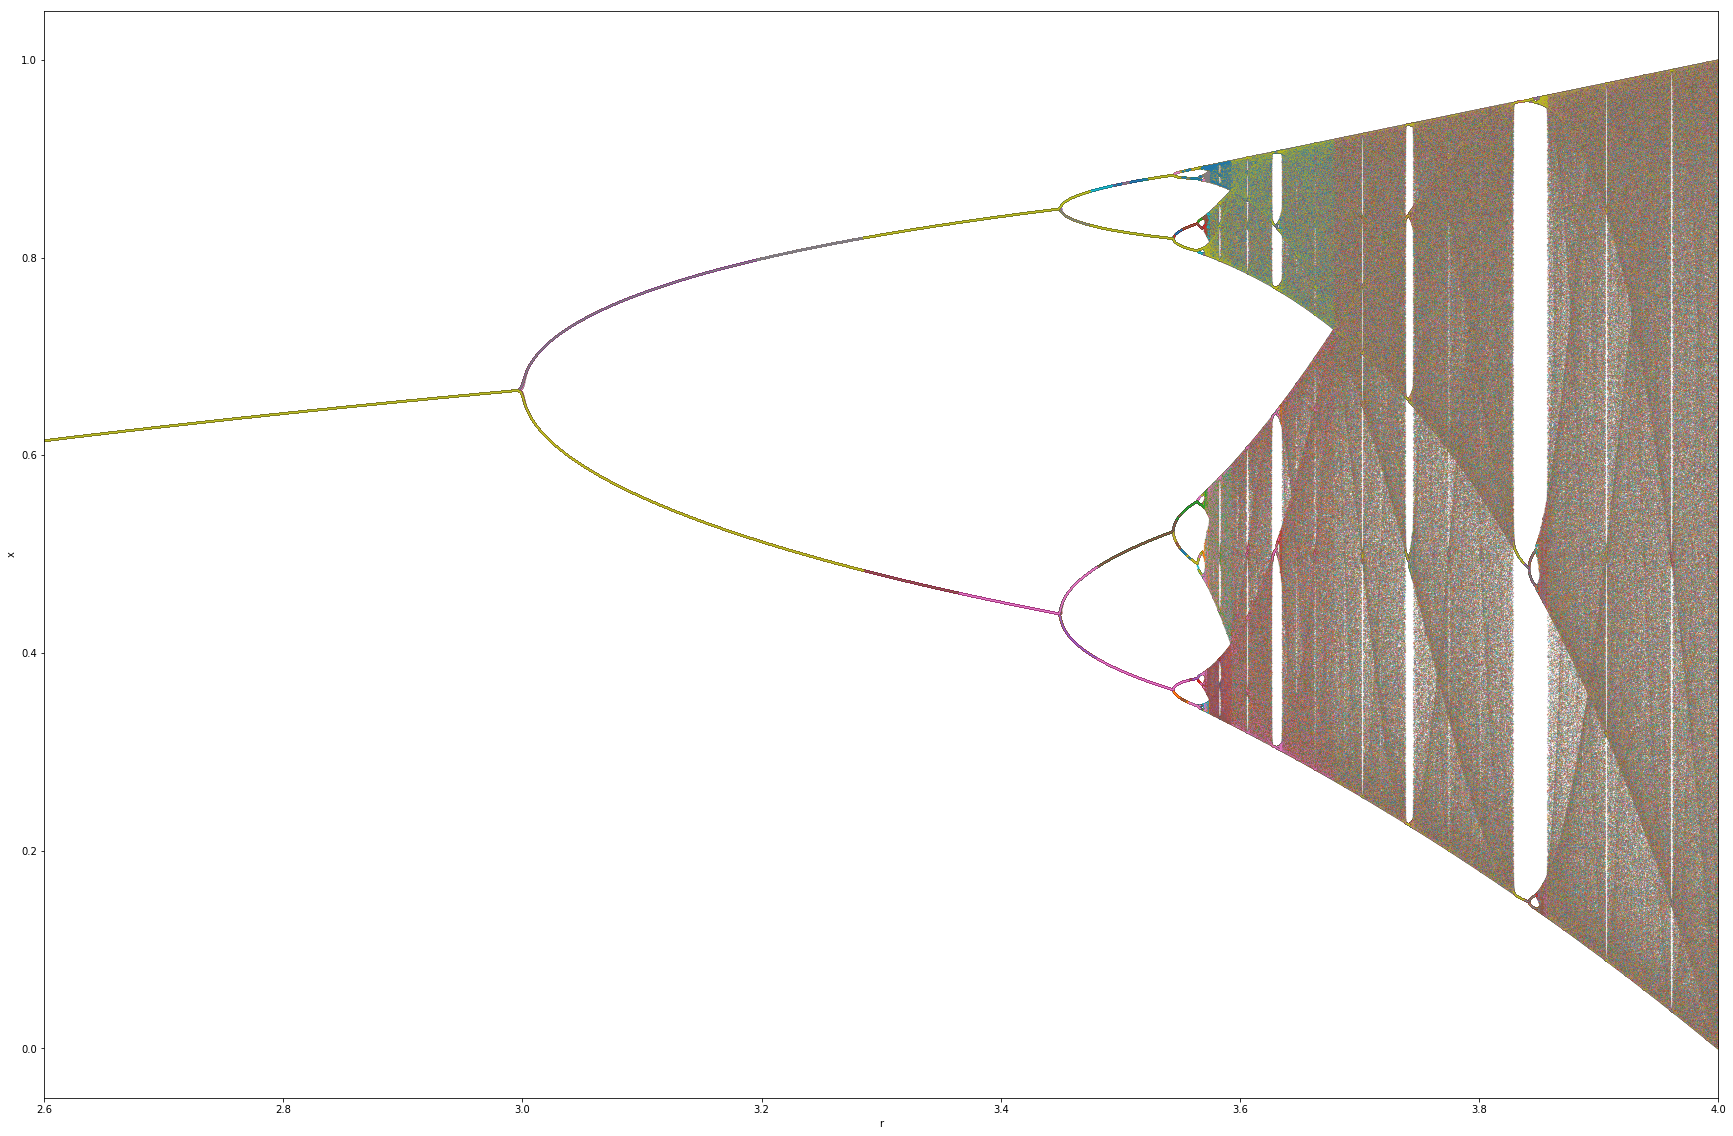

In [40]:
plt.figure(figsize=(30,20))
plt.plot(r,x, '.', markersize=0.2)
plt.xlabel('r')
plt.ylabel('x')
plt.xlim(2.6,4)

(0.2, 0.7)

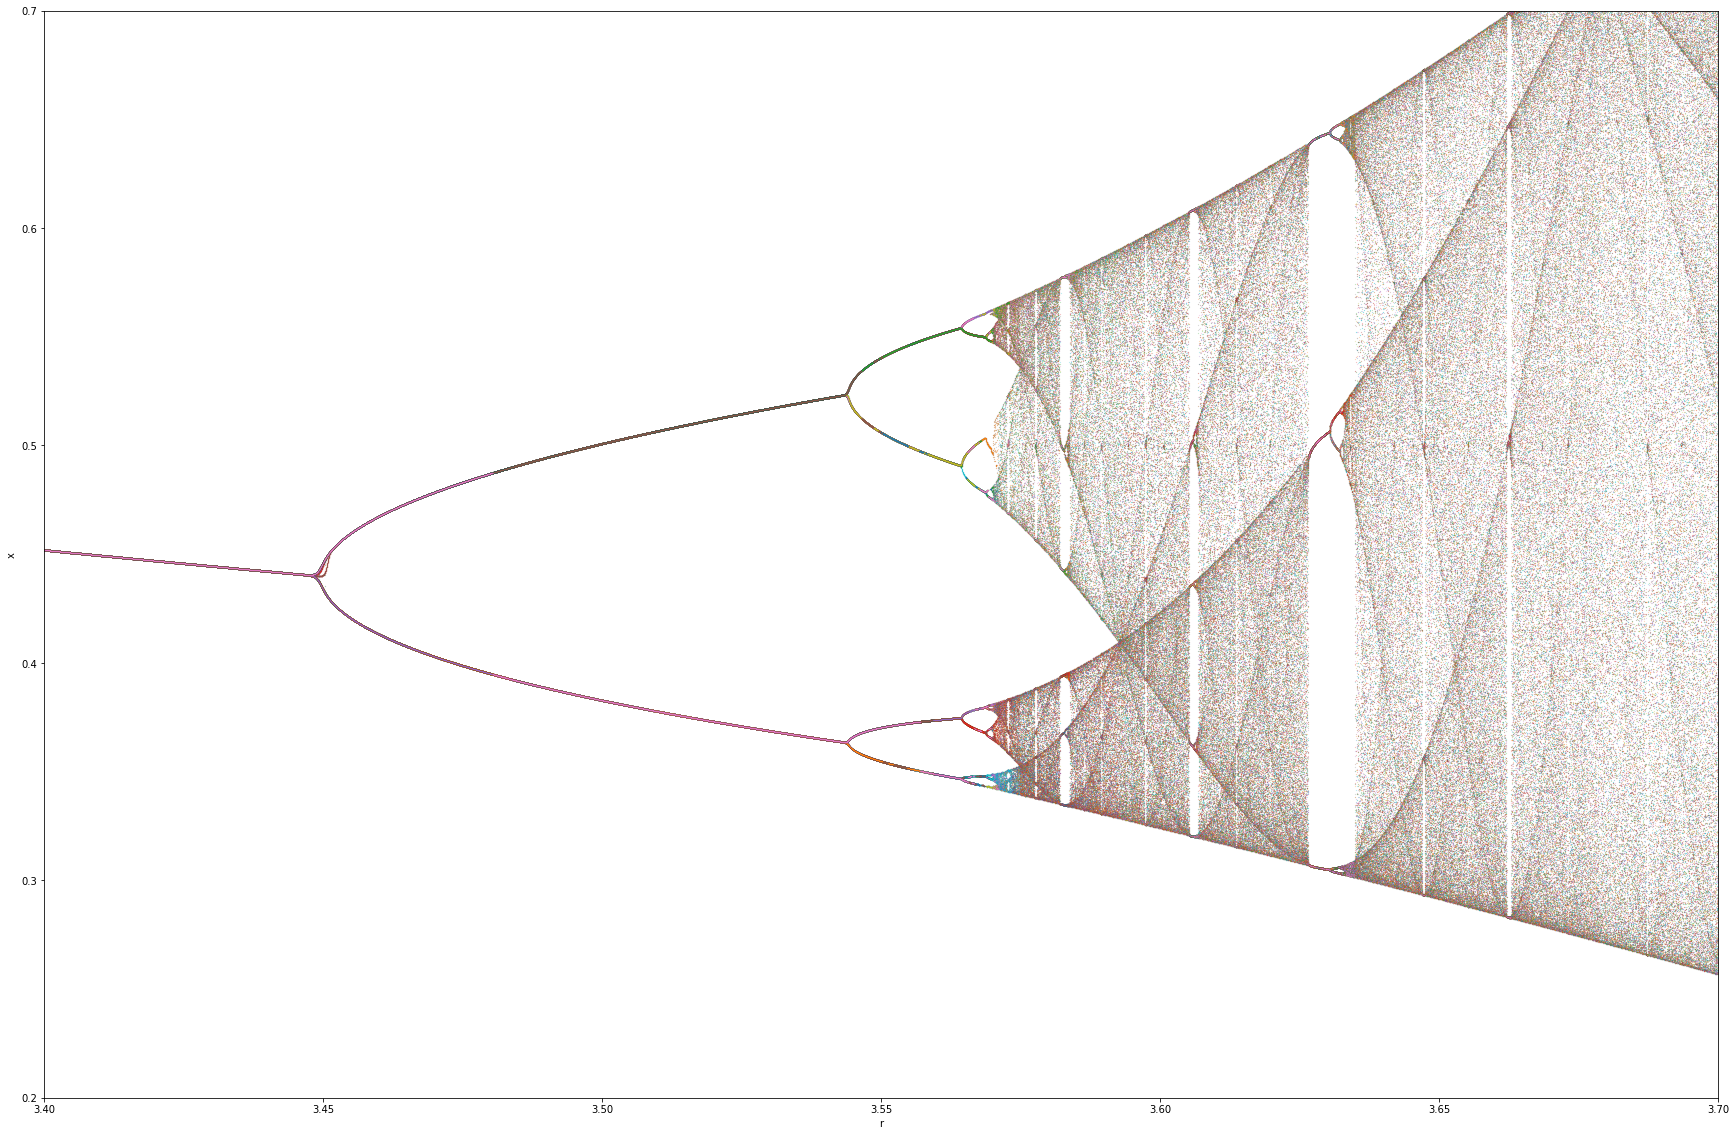

In [39]:
plt.figure(figsize=(30,20))
plt.plot(r,x, '.', markersize=0.2)
plt.xlabel('r')
plt.ylabel('x')
plt.xlim(3.4,3.7)
plt.ylim(0.2,0.7)

In [83]:
## Mandelbrot set
# z_{n+1} = z_{n}^2 + c

# correspondence with logistic map
# z = r * (1/2 -x);   c = r/2 * (1 - r/2),   for r in [1,4]


array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
       [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
       [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
       ...,
       [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
       [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9],
       [ 2. ,  2. ,  2. , ...,  2. ,  2. ,  2. ]])

In [2]:
def mandelbrot(c,N):
    c = c.reshape(-1)
    z = np.zeros(c.shape)*1j # declare as complex
    
    mtemp = np.abs(z)<100 # initialize mtemp
    mcount = np.zeros(c.shape) # count number of iterations for color
    for n in range(0,N):
        z[mtemp] = np.square(z[mtemp]) + c[mtemp]
        # avoid numbers growing too large for computer to handle
        mtemp = np.logical_and(np.abs(z)<1000, np.abs(z)>1e-4)
        mcount[mtemp] = n
    #     if np.mod(n,5)==0: # check every 5 iterations
    #         mtemp = np.logical_and(np.abs(z)<1000, np.abs(z)>1e-4)
    return mcount
    
# m = np.abs(z)<= np.max(abs(c)) # numbers in Mandelbrot set remain bounded to initial range after loop operation

In [13]:
clim = [ -0.565 , -0.54, -0.55, -0.525]  #[-2, 1, -1.5, 1.5] limits of real and imaginary numbers 
cstep = 1e-5
a, b = np.meshgrid(np.arange(clim[0],clim[1]+cstep,cstep),np.arange(clim[2],clim[3]+cstep,cstep))

c = a + 1j*b

N = 100
m = mandelbrot(c,N)
m = m.reshape(c.shape)

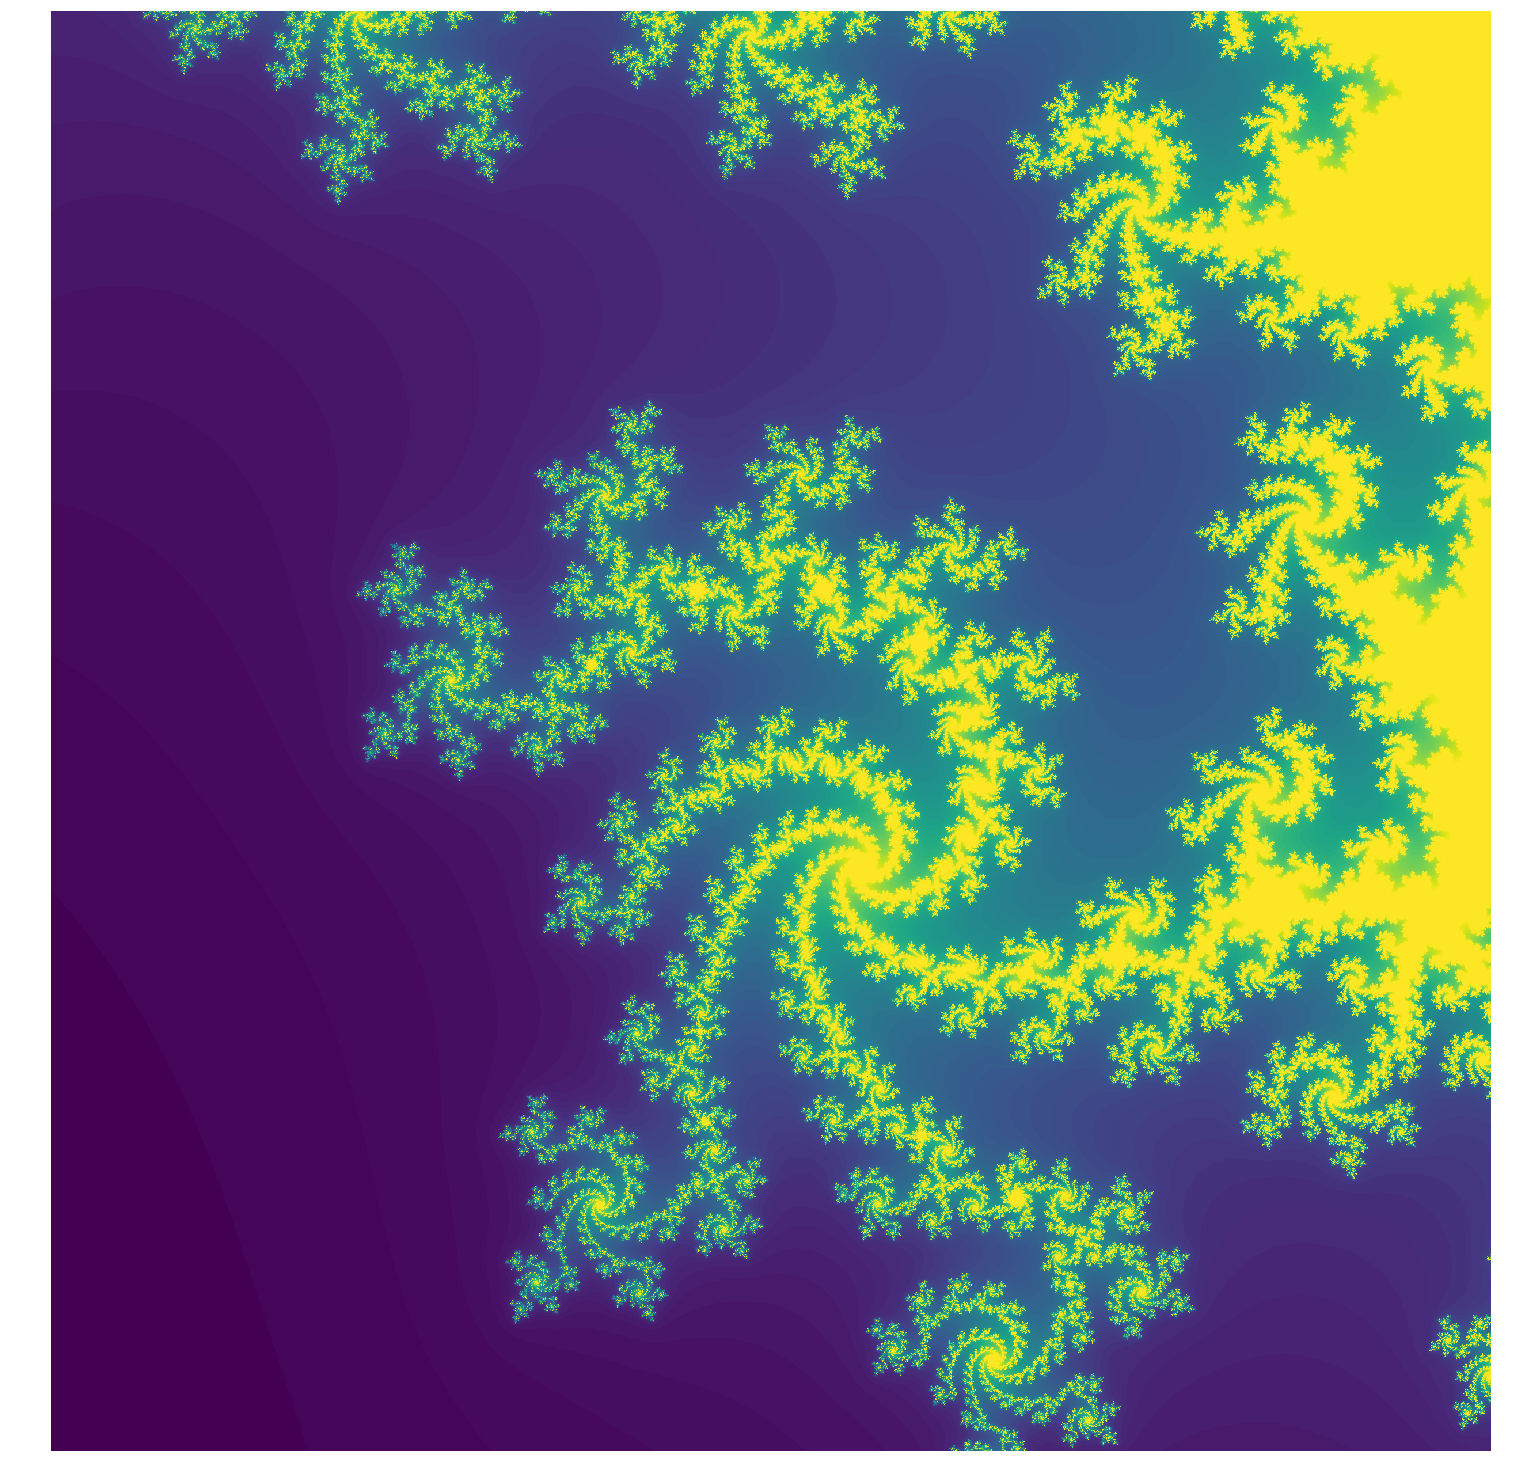

In [14]:
fig = plt.figure(figsize=(20,20))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
# cmap='hot'
ax = plt.imshow(m, extent=[-.5*cstep + clim[0], clim[1] + .5*cstep, clim[3] +.5*cstep, clim[2] - .5*cstep]) 
# plt.xlabel('R')
# plt.ylabel('I')
# plt.xlim(-.6,-.4)
# plt.ylim(-.5,-.7)
fig.savefig('mandelbrot_detail1.png')

In [24]:
clim = [ -0.35 , -0.3, 0.62, 0.66]  #[-2, 1, -1.5, 1.5] limits of real and imaginary numbers 
cstep = 1e-5
a, b = np.meshgrid(np.arange(clim[0],clim[1]+cstep,cstep),np.arange(clim[2],clim[3]+cstep,cstep))
c = a + 1j*b

N = 200
m = mandelbrot(c,N)
m = m.reshape(c.shape)

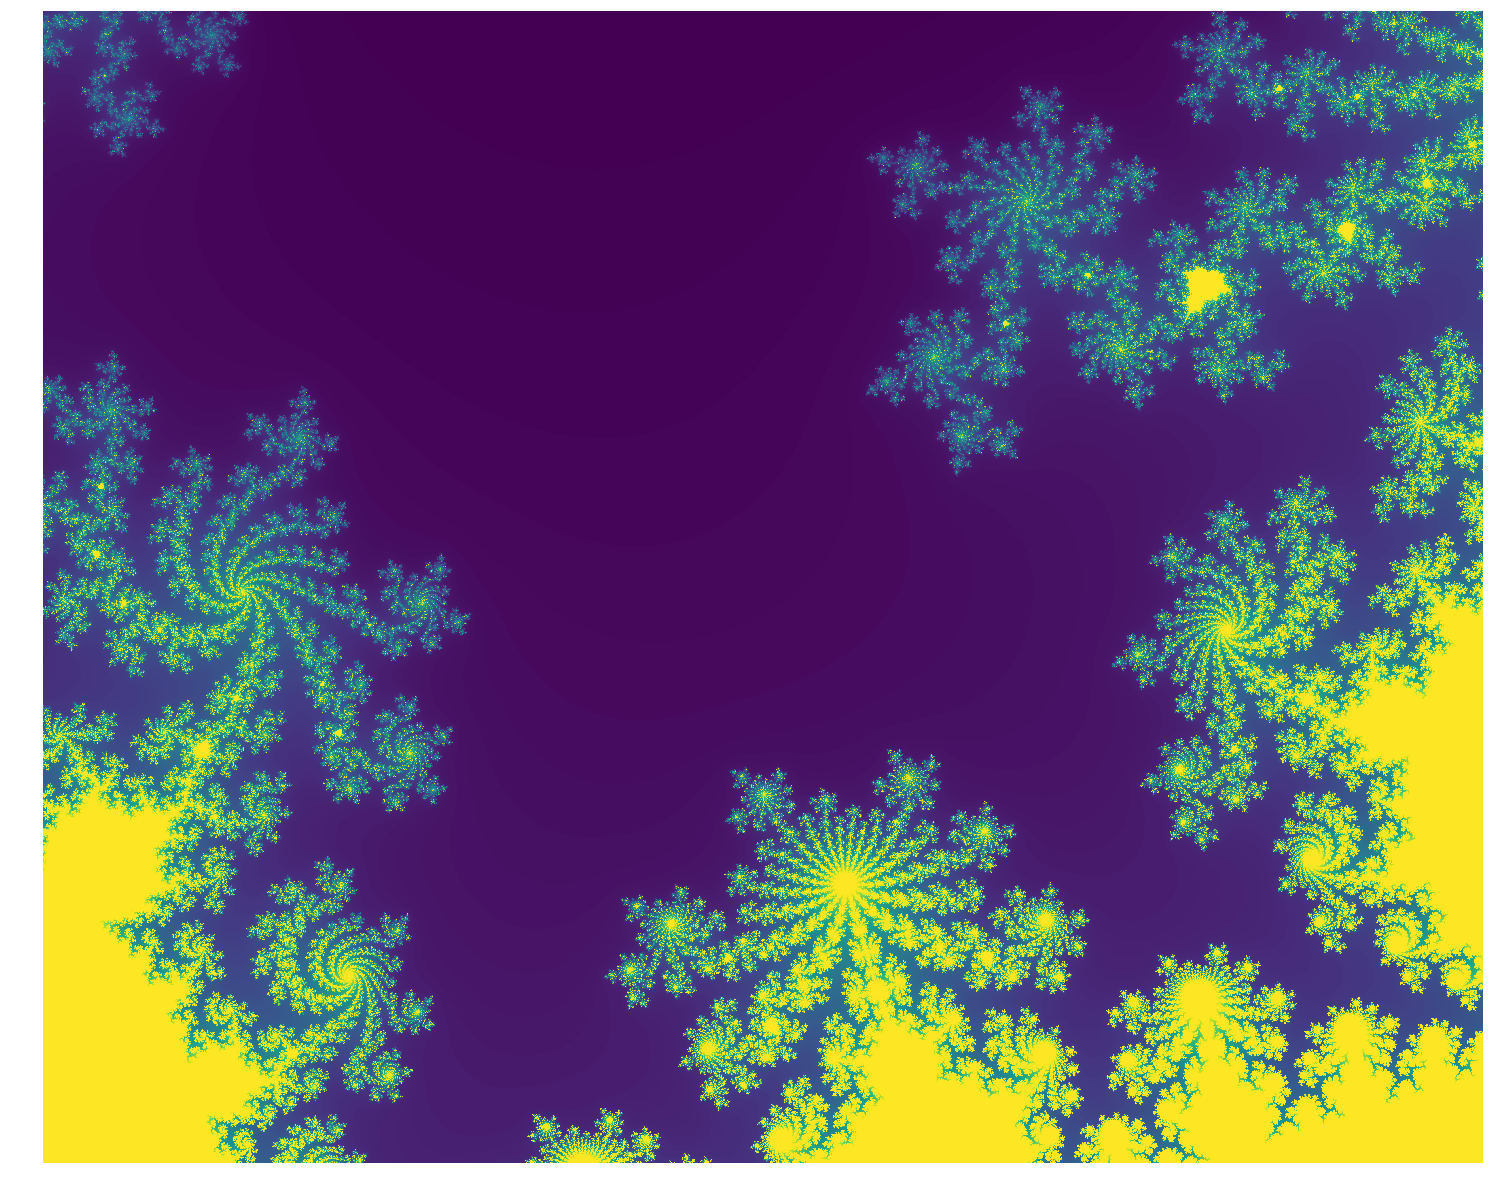

In [26]:
fig = plt.figure(figsize=(20,20))
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
# cmap='hot'
ax = plt.imshow(m, extent=[-.5*cstep + clim[0], clim[1] + .5*cstep, clim[3] +.5*cstep, clim[2] - .5*cstep]) 
# plt.xlabel('R')
# plt.ylabel('I')
plt.xlim(-0.35,-0.3)
plt.ylim(0.62,0.66)
fig.savefig('mandelbrot_detail2.png')